**Ankit Sekseria  
 D19005  
 Varishu Pant  
 D19033**

**Question 5:**
Read the context carefully:
Both K-means and hierarchical clustering will assign each observation to a cluster. However, sometimes this might not be appropriate. For instance, suppose that most of the observations truly belong to a small number of (unknown) subgroups, and a small subset of the observations are quite different from each other and from all other observations. Then since K Means and hierarchical clustering force every observation into a cluster, the clusters found may be heavily distorted due to the presence of outliers that do not belong to any cluster. Mixture models are an attractive approach for accommodating the presence of such outliers.

Design an experimental problem to validate the distortion of clusters might be a result due to the presence of outliers. (Designing an experimental data having only 2-dimension will do. This is just of illustration. Use proper visualization and possible use of colour encodings).

At the end of the context is mentioned about mixture models. Find out a little more about it, like what is mixture models, what is the intuitive idea behind such models, etc.


### Importing Required Libraries

In [347]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy as hi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
import time
from sklearn.datasets import make_circles,make_blobs,make_moons,make_regression
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_regression

sns.set()

### Generating Data in 3 steps

#### Step1-Creating 2 random datasets of elliptical shapes with noise

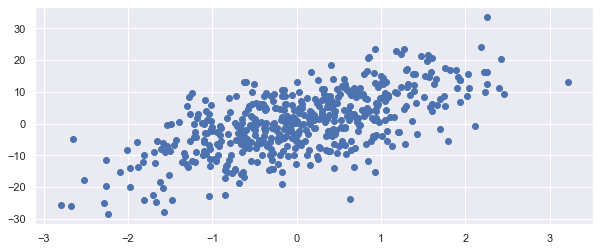

In [353]:
plt.rcParams['figure.figsize'] = [10, 4]

# generate regression dataset
X1, y1 = make_regression(n_samples=500, n_features=1, noise=7.05,random_state=9)
# plot regression dataset
pyplot.scatter(X1,y1)
pyplot.show()

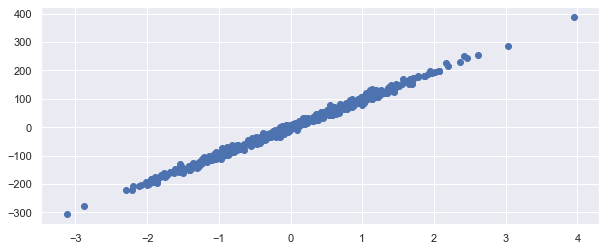

In [354]:
plt.rcParams['figure.figsize'] = [10, 4]

X2, y2 = make_regression(n_samples=500, n_features=1, noise=7.05,random_state=18)
# plot regression dataset
pyplot.scatter(X2,y2)
pyplot.show()

#### Step 2- Creating outliers

First we generate dataset with 5000 samples spanning -4 to 4 in the x axis

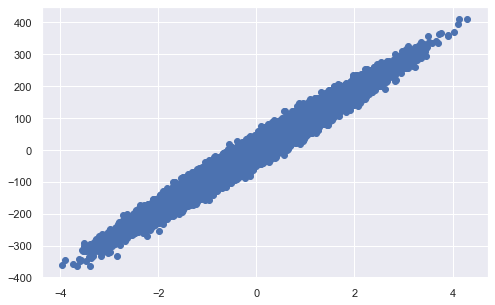

In [355]:
plt.rcParams['figure.figsize'] = [8, 5]

X3, y3 = make_regression(n_samples=50000, n_features=1, noise=17.05,random_state=2)
plt.scatter(X3,y3)
plt.show()

Then we subset out values after 3.5 because our previous 2 datasets end at 3

In [356]:
X3=X3[np.where(X3>3.5)]
y3=y3[np.where(X3>3.5)]

#### Step 3- Putting all the dataframes together to create the final data

In [357]:
X1=pd.DataFrame(X1)
X2=pd.DataFrame(X2)
X3=pd.DataFrame(X3)
y1=pd.DataFrame(y1)
y2=pd.DataFrame(y2)
y3=pd.DataFrame(y3)
X=np.array(pd.concat([X1,X2,X3])).T[0].T
y=pd.concat([y1,y2,y3])
y=np.array(y.T)[0]
data=pd.DataFrame(X,y)
data=data.reset_index()
data.columns=['0','1']

### Plotting AIC,BIC curves to decide on number of clusters

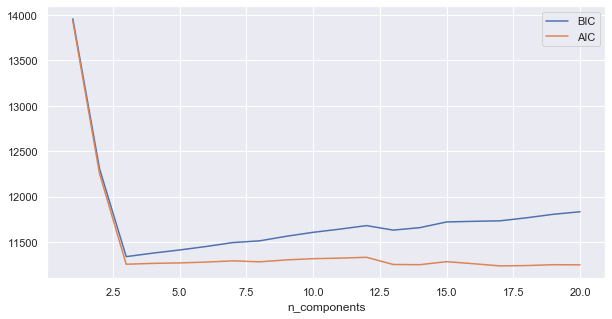

In [358]:
plt.rcParams['figure.figsize'] = [10, 5]

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data) for n in n_components]
plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

**Observation-**
The AIC,BIC values are the lowest for 3 clusters which was expected.
We go ahead with fitting the data,first in K-means model and then in Gaussian Mixture Model.

### Comparing K-Means and Gaussian Mixture Model

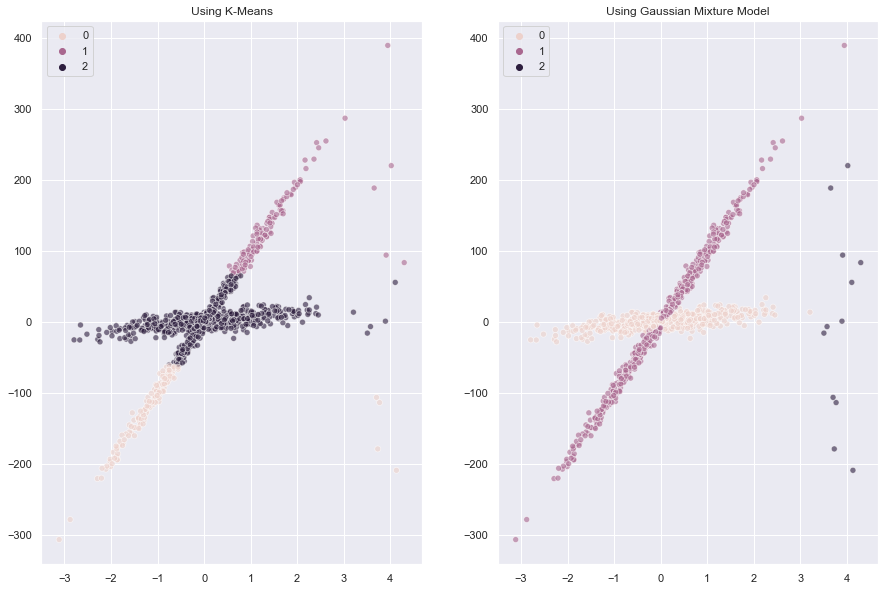

In [339]:
plt.rcParams['figure.figsize'] = [15, 10]

kmeans_sel = KMeans(init='k-means++',n_clusters=3,n_init=100, random_state=101)
clusters_km=kmeans_sel.fit_predict(data)
clusters_gmm=GaussianMixture(n_components = 3,n_init=100).fit_predict(data)

fig, axes = plt.subplots(1, 2)
axes[0].set_title('Using K-Means')
axes[1].set_title('Using Gaussian Mixture Model')

sns.scatterplot(x=X,y=y, cmap =plt.cm.winter, alpha = 0.6,hue=clusters_km,ax=axes[0])
sns.scatterplot(x=X,y=y, cmap =plt.cm.winter, alpha = 0.6,hue=clusters_gmm,ax=axes[1])
plt.show()

**Observation-**

We observe that K-Means fail to cluster the 2 datasets that are in the shape of a cross and also failed to cluster outliers togther in a single cluster. The clusters formed get distorted due to the presence of outliers.
Wherease Gaussian Mixture Model worked perfectly and clustered the 2 cross shaped datasets separately into 2 clusters and was also able to identify outliers and cluster them in the 3rd cluster.